In [1]:
#requred libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV




### Data Desciption

### Data Gathering

In [2]:
df=pd.read_csv("data_mobile_price_range.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### EDA

In [3]:
df.shape


(2000, 21)

In [4]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


c:\Users\Akshay\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fc', ylabel='Density'>

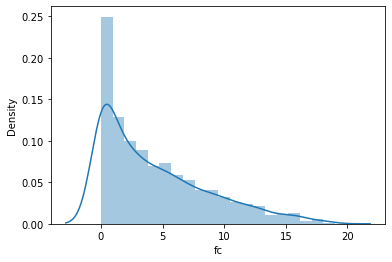

In [7]:
sns.distplot(df["fc"])

c:\Users\Akshay\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='four_g', ylabel='Density'>

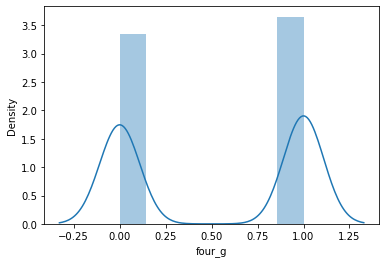

In [8]:
sns.distplot(df["four_g"])

In [9]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


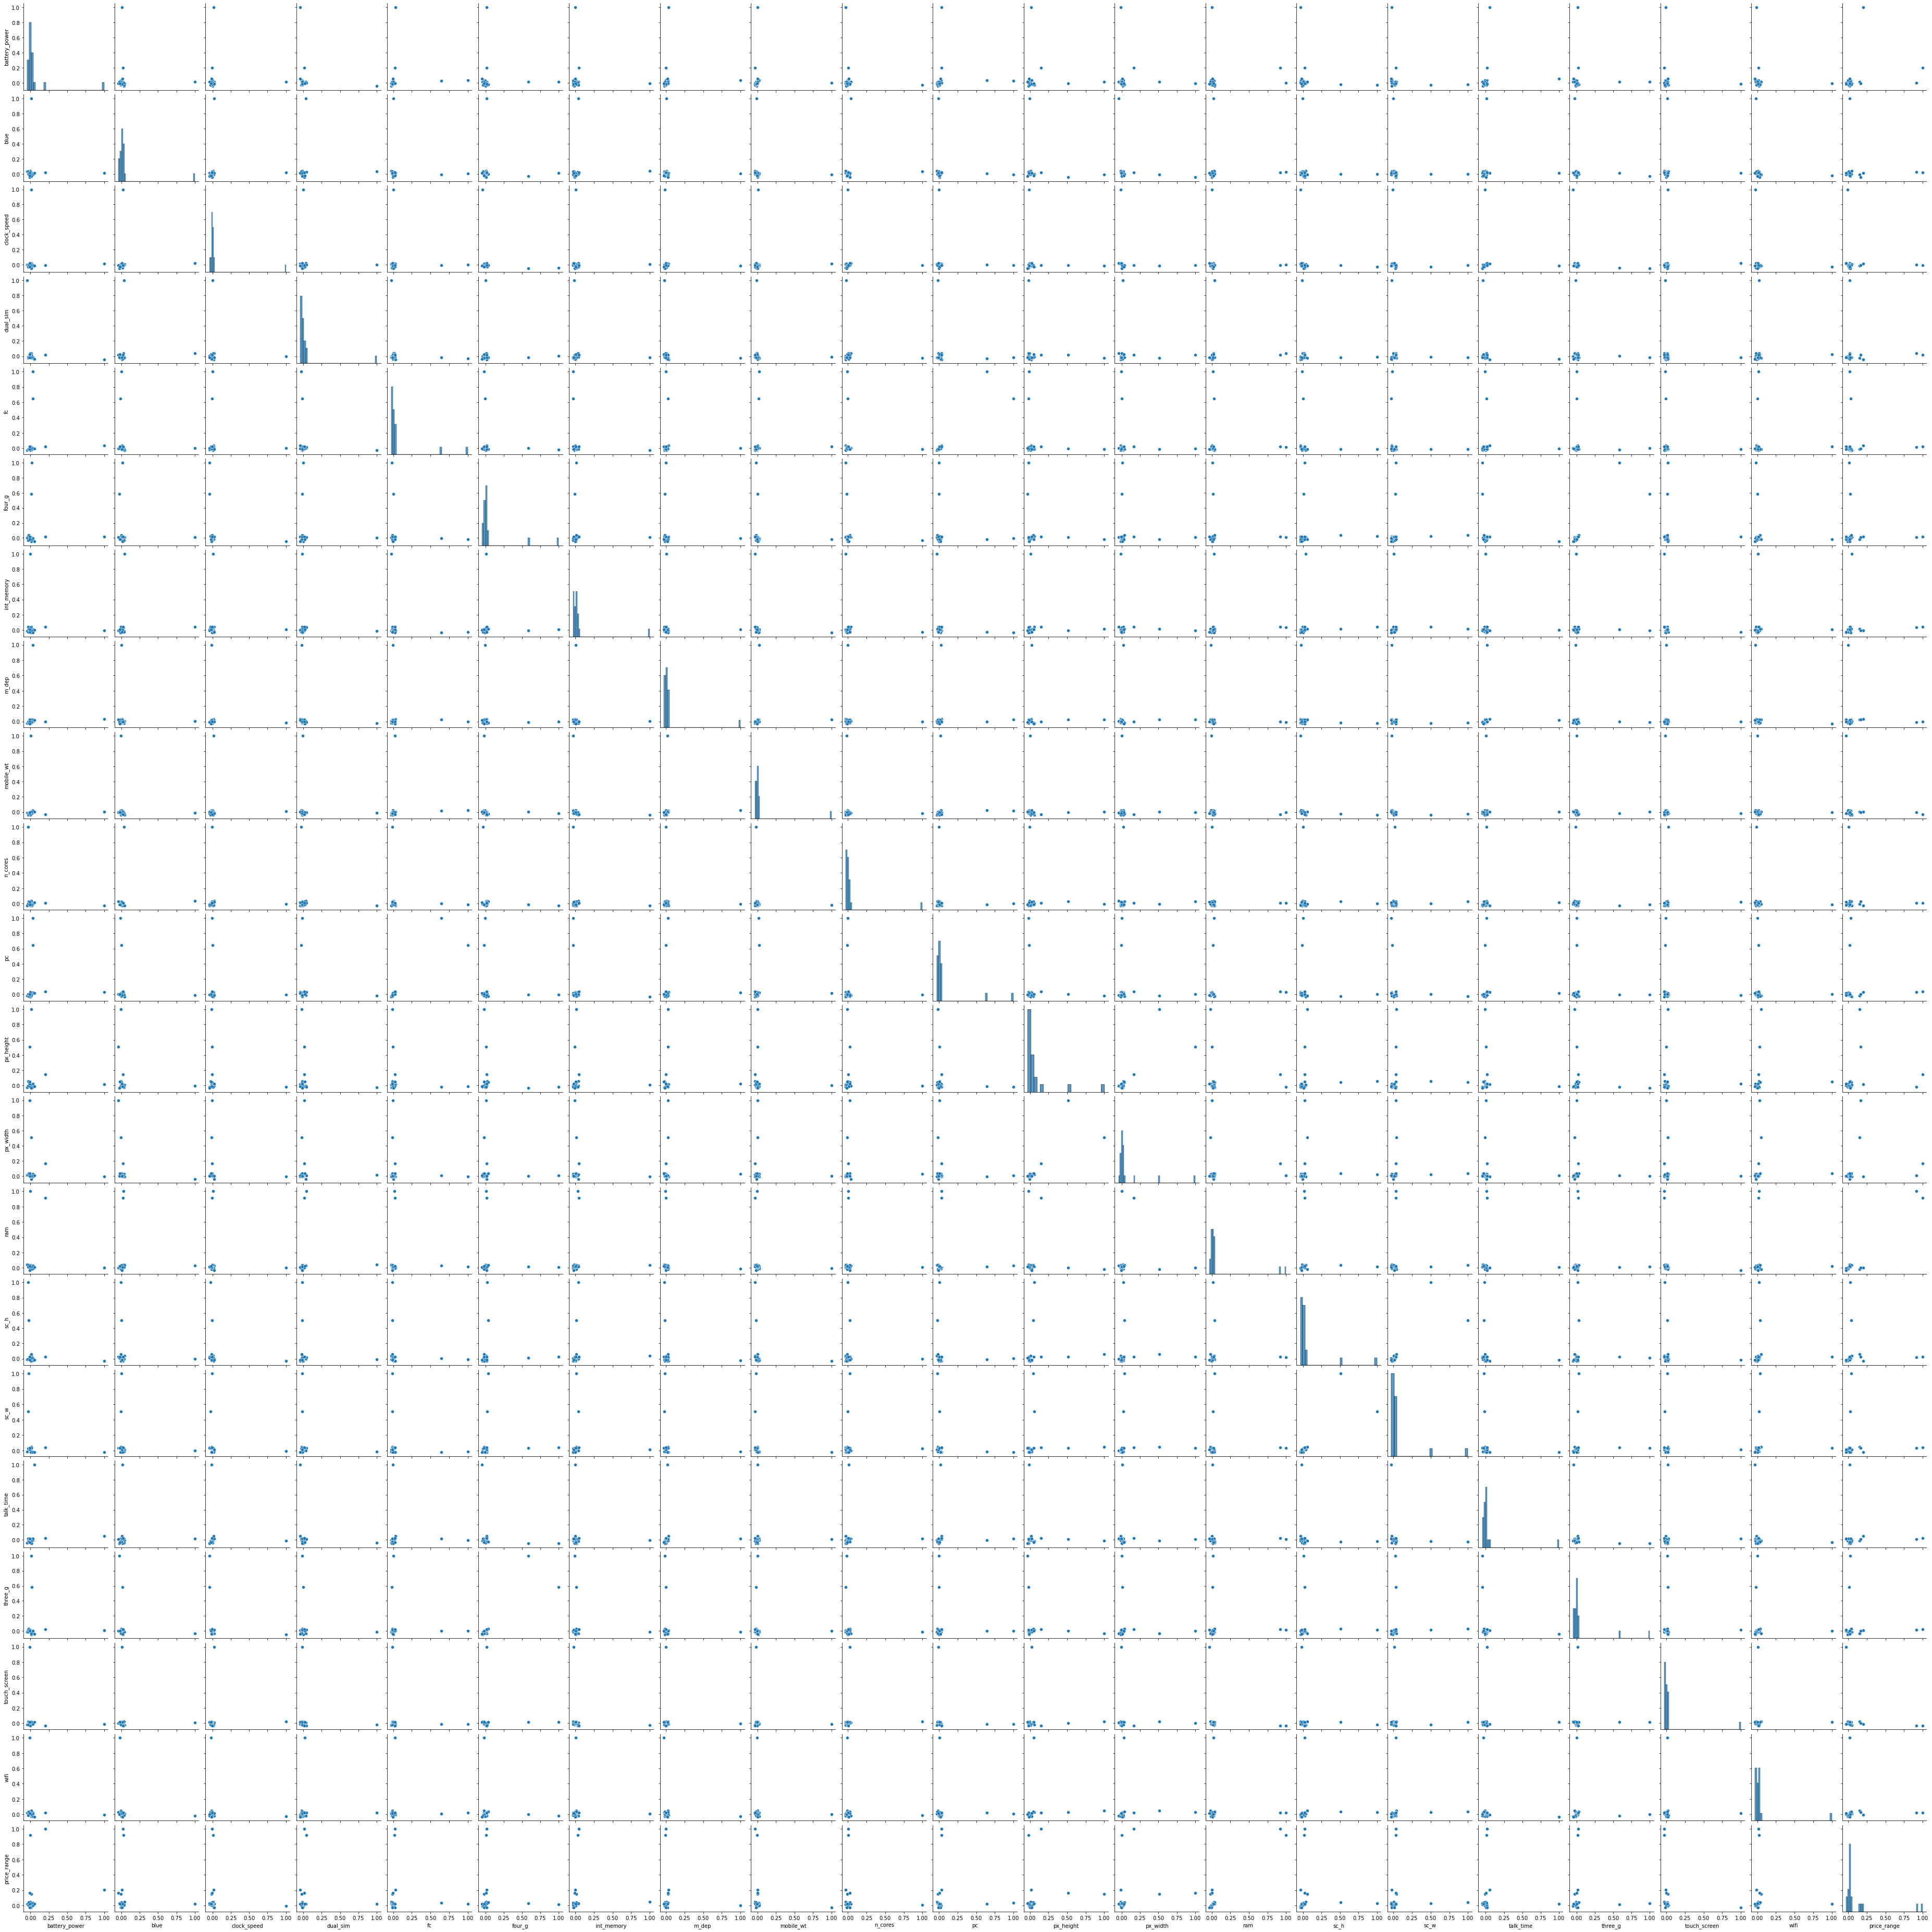

In [10]:
sns.pairplot(df.corr())

<AxesSubplot:>

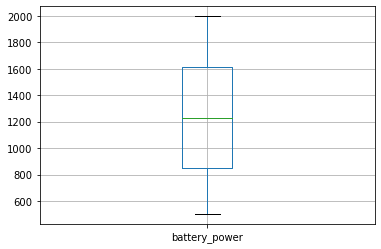

In [11]:
df[["battery_power"]].boxplot()

<AxesSubplot:>

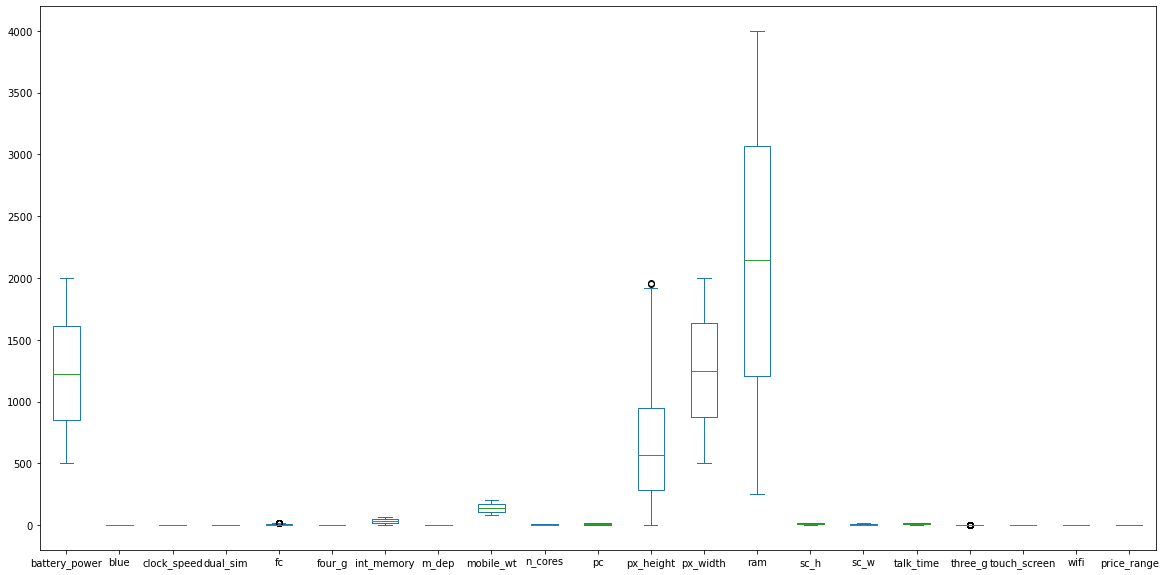

In [12]:

df.plot(kind="box",figsize=(20,10))

<AxesSubplot:>

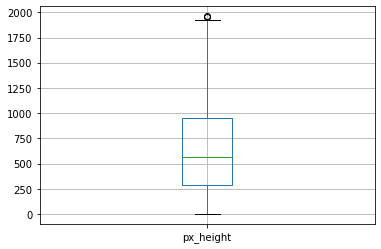

In [13]:
df[["px_height"]].boxplot()

<AxesSubplot:>

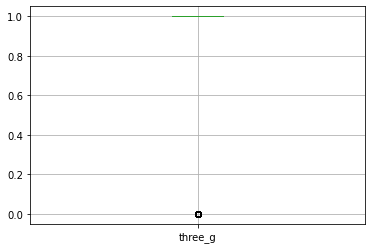

In [14]:
df[["three_g"]].boxplot()

c:\Users\Akshay\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='battery_power', ylabel='Density'>

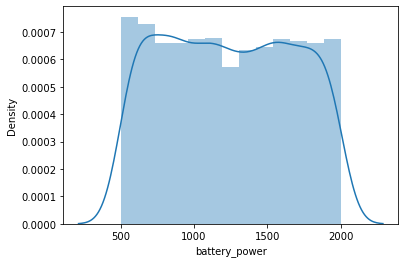

In [15]:
sns.distplot(df["battery_power"])

<AxesSubplot:xlabel='battery_power', ylabel='Density'>

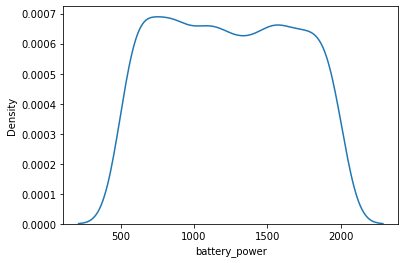

In [16]:
sns.kdeplot(df["battery_power"])

### Model Training

In [17]:
df_mobile=df.copy()

In [18]:
x=df_mobile.drop("price_range",axis=1)
y=df_mobile["price_range"]

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
df_normal=MinMaxScaler()
array=df_normal.fit_transform(x)
x_normal=pd.DataFrame(array,columns=x.columns)
x_normal


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_normal,y,test_size=0.2,random_state=25,stratify=y)

In [22]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
y_pred_train=knn_model.predict(x_train)
cfm=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix=\n",cfm)
accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy=\n",accuracy)
cp=classification_report(y_train,y_pred_train)
print("classification_report=\n",cp)

confusion_matrix=
 [[318  53  28   1]
 [ 97 241  43  19]
 [ 45 100 214  41]
 [  8  56 118 218]]
accuracy=
 0.619375
classification_report=
               precision    recall  f1-score   support

           0       0.68      0.80      0.73       400
           1       0.54      0.60      0.57       400
           2       0.53      0.54      0.53       400
           3       0.78      0.55      0.64       400

    accuracy                           0.62      1600
   macro avg       0.63      0.62      0.62      1600
weighted avg       0.63      0.62      0.62      1600



In [24]:
y_pred_test=knn_model.predict(x_test)
cfm=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix=\n",cfm)
accuracy=accuracy_score(y_test,y_pred_test)
print("accuracy=\n",accuracy)
cp=classification_report(y_test,y_pred_test)
print("classification_report=\n",cp)

confusion_matrix=
 [[65 18 15  2]
 [39 28 20 13]
 [18 32 32 18]
 [ 6 12 33 49]]
accuracy=
 0.435
classification_report=
               precision    recall  f1-score   support

           0       0.51      0.65      0.57       100
           1       0.31      0.28      0.29       100
           2       0.32      0.32      0.32       100
           3       0.60      0.49      0.54       100

    accuracy                           0.43       400
   macro avg       0.43      0.43      0.43       400
weighted avg       0.43      0.43      0.43       400



In [25]:
KNN_model=KNeighborsClassifier()
hyperparameter={"n_neighbors":np.arange(3,20),
               "p":[1,2]}
gcsv_knn=GridSearchCV(KNN_model,hyperparameter,cv=5)
gcsv_knn.fit(x_train,y_train)
gcsv_knn.best_estimator_


KNeighborsClassifier(n_neighbors=18, p=1)

In [26]:
knn_model1=KNeighborsClassifier(n_neighbors=18, p=1)
knn_model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=18, p=1)

In [27]:
y_pred_train=knn_model1.predict(x_train)
cfm=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix=\n",cfm)
accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy=\n",accuracy)
cp=classification_report(y_train,y_pred_train)
print("classification_report=\n",cp)

confusion_matrix=
 [[333  54  13   0]
 [ 93 224  67  16]
 [ 21  99 226  54]
 [  2  19  95 284]]
accuracy=
 0.666875
classification_report=
               precision    recall  f1-score   support

           0       0.74      0.83      0.78       400
           1       0.57      0.56      0.56       400
           2       0.56      0.56      0.56       400
           3       0.80      0.71      0.75       400

    accuracy                           0.67      1600
   macro avg       0.67      0.67      0.67      1600
weighted avg       0.67      0.67      0.67      1600



In [28]:
y_pred_test=knn_model1.predict(x_test)
cfm=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix=\n",cfm)
accuracy=accuracy_score(y_test,y_pred_test)
print("accuracy=\n",accuracy)
cp=classification_report(y_test,y_pred_test)
print("classification_report=\n",cp)

confusion_matrix=
 [[79 15  6  0]
 [43 34 20  3]
 [12 24 44 20]
 [ 0  4 19 77]]
accuracy=
 0.585
classification_report=
               precision    recall  f1-score   support

           0       0.59      0.79      0.68       100
           1       0.44      0.34      0.38       100
           2       0.49      0.44      0.47       100
           3       0.77      0.77      0.77       100

    accuracy                           0.58       400
   macro avg       0.57      0.58      0.57       400
weighted avg       0.57      0.58      0.57       400



In [29]:
import json
import pickle

In [30]:
dict1={"columns":list(x.columns)}

In [31]:
KNN_model=KNeighborsClassifier()
hyperparameter={"n_neighbors":np.arange(3,45),
               "p":[1,2]}
gcsv_knn=RandomizedSearchCV(KNN_model,hyperparameter,cv=5)
gcsv_knn.fit(x_train,y_train)
gcsv_knn.best_estimator_

KNeighborsClassifier(n_neighbors=36, p=1)

In [32]:
knn_model5=KNeighborsClassifier(n_neighbors=38, p=1)
knn_model5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=38, p=1)

In [33]:
y_pred_train=knn_model5.predict(x_train)
cfm=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix=\n",cfm)
accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy=\n",accuracy)
cp=classification_report(y_train,y_pred_train)
print("classification_report=\n",cp)

confusion_matrix=
 [[343  49   8   0]
 [121 211  64   4]
 [ 10  91 232  67]
 [  0  13  86 301]]
accuracy=
 0.679375
classification_report=
               precision    recall  f1-score   support

           0       0.72      0.86      0.78       400
           1       0.58      0.53      0.55       400
           2       0.59      0.58      0.59       400
           3       0.81      0.75      0.78       400

    accuracy                           0.68      1600
   macro avg       0.68      0.68      0.68      1600
weighted avg       0.68      0.68      0.68      1600



In [34]:
y_pred_test=knn_model5.predict(x_test)
cfm=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix=\n",cfm)
accuracy=accuracy_score(y_test,y_pred_test)
print("accuracy=\n",accuracy)
cp=classification_report(y_test,y_pred_test)
print("classification_report=\n",cp)

confusion_matrix=
 [[80 18  2  0]
 [33 44 18  5]
 [ 5 23 53 19]
 [ 1  1 18 80]]
accuracy=
 0.6425
classification_report=
               precision    recall  f1-score   support

           0       0.67      0.80      0.73       100
           1       0.51      0.44      0.47       100
           2       0.58      0.53      0.55       100
           3       0.77      0.80      0.78       100

    accuracy                           0.64       400
   macro avg       0.63      0.64      0.64       400
weighted avg       0.63      0.64      0.64       400



In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42,stratify=y)

In [36]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred_train=dt_model.predict(x_train)
cfm=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix=\n",cfm)
accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy=\n",accuracy)
cp=classification_report(y_train,y_pred_train)
print("classification_report=\n",cp)

confusion_matrix=
 [[400   0   0   0]
 [  0 400   0   0]
 [  0   0 400   0]
 [  0   0   0 400]]
accuracy=
 1.0
classification_report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [38]:
y_pred_test=dt_model.predict(x_test)
cfm=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix=\n",cfm)
accuracy=accuracy_score(y_test,y_pred_test)
print("accuracy=\n",accuracy)
cp=classification_report(y_test,y_pred_test)
print("classification_report=\n",cp)

confusion_matrix=
 [[93  7  0  0]
 [13 77 10  0]
 [ 0  9 86  5]
 [ 0  0 16 84]]
accuracy=
 0.85
classification_report=
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       100
           1       0.83      0.77      0.80       100
           2       0.77      0.86      0.81       100
           3       0.94      0.84      0.89       100

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



### Hyperpatameter tunning

In [39]:
dt_model=DecisionTreeClassifier()
hyperparameter={"criterion":["gini","entropy"],
               "random_state":[45,41],
                 "max_depth":np.arange(3,8),
                 "min_samples_split":np.arange(2,20),
                 "min_samples_leaf":np.arange(2,15)}
gscv_dt_clf = GridSearchCV(dt_model,hyperparameter,cv = 5)
gscv_dt_clf.fit(x_train,y_train)






GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'random_state': [45, 41]})

In [40]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=11,
                       random_state=41)

In [41]:
dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=11,
                       random_state=41)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=11,
                       random_state=41)

In [42]:
y_pred_train=dt_model.predict(x_train)
cfm=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix=\n",cfm)
accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy=\n",accuracy)
cp=classification_report(y_train,y_pred_train)
print("classification_report=\n",cp)

confusion_matrix=
 [[381  19   0   0]
 [ 24 355  21   0]
 [  0  18 349  33]
 [  0   0  16 384]]
accuracy=
 0.918125
classification_report=
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       400
           1       0.91      0.89      0.90       400
           2       0.90      0.87      0.89       400
           3       0.92      0.96      0.94       400

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



In [43]:
y_pred_test=dt_model.predict(x_test)
cfm=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix=\n",cfm)
accuracy=accuracy_score(y_test,y_pred_test)
print("accuracy=\n",accuracy)
cp=classification_report(y_test,y_pred_test)
print("classification_report=\n",cp)

confusion_matrix=
 [[94  6  0  0]
 [ 8 78 14  0]
 [ 0  9 82  9]
 [ 0  0  5 95]]
accuracy=
 0.8725
classification_report=
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       100
           1       0.84      0.78      0.81       100
           2       0.81      0.82      0.82       100
           3       0.91      0.95      0.93       100

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [44]:
with open ("model.pickle","wb") as f:
    pickle.dump(dt_model,f)